In [42]:
# IMPORTING REQUIRED LAIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [2]:
# loading dataset
abalone_data = pd.read_csv("abalone.csv")

In [3]:
# extraing first 5 rows
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# checking missing values
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

AS PER ABOVE OBSERVATION THERE IS NO MISSING VALUES

In [5]:
abalone_data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
# To check total no. rows and columns
abalone_data.shape

(4177, 9)

In [7]:
abalone_data['Rings'].unique() # to check the unique value of Rings

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

VISUALIZATION

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

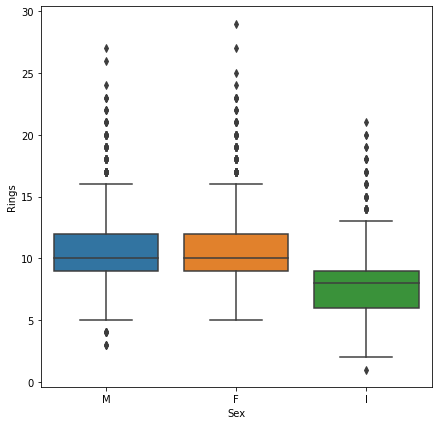

In [8]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Sex',y='Rings',data=abalone_data)

As per the above observation the Rings for I are lesser in comparison to M & F

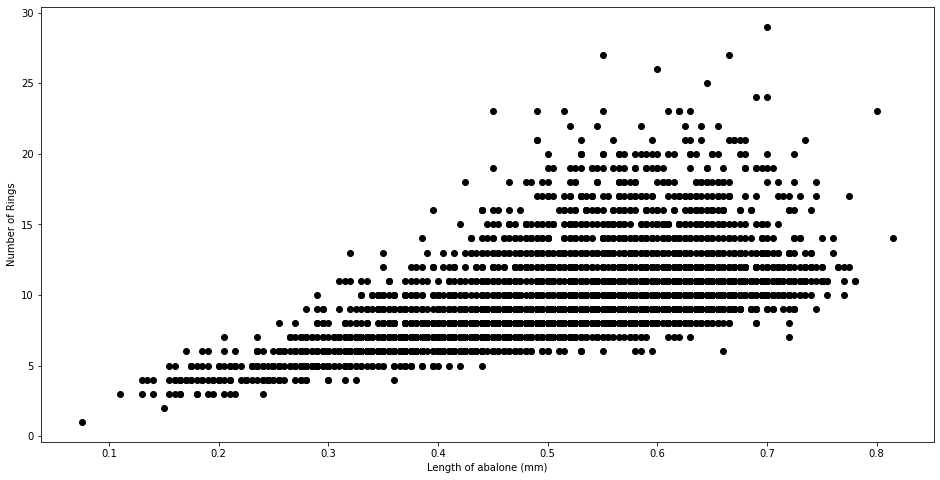

In [44]:
#  Length vs Rings

plt.figure(figsize=(16,8))
plt.scatter(abalone_data['Length'],abalone_data['Rings'],c='black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of Rings')
plt.show()

As per the above observation, most of the points are near to the best fit line,2 outliers are there.

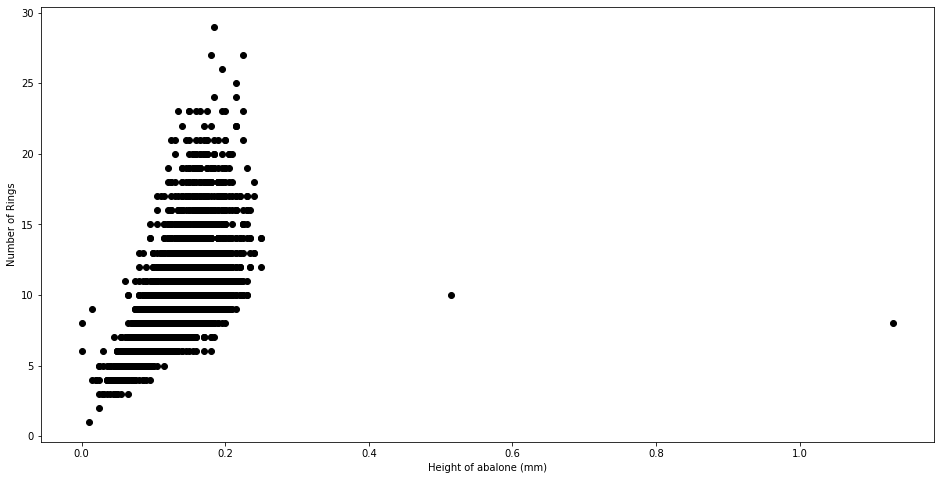

In [46]:
# Height vs Rings

plt.figure(figsize=(16,8))
plt.scatter(abalone_data['Height'],abalone_data['Rings'],c='black')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of Rings')
plt.show()

As per above observation i can see 2 outliers

In [47]:
# Lets compare Height Length and Rigs together with the help of 3D plot
from mpl_toolkits.mplot3d import Axes3D

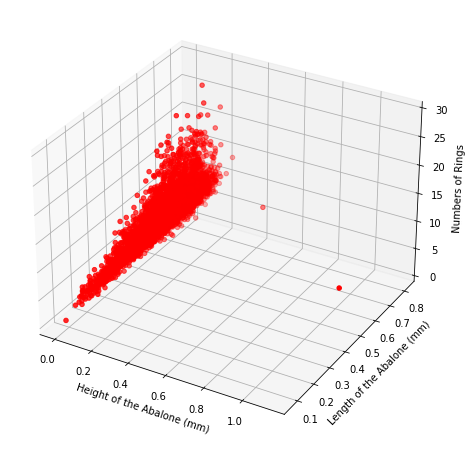

In [52]:
plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('Height of the Abalone (mm)')
ax.set_ylabel('Length of the Abalone (mm)')
ax.set_zlabel('Numbers of Rings')
ax.scatter3D(abalone_data['Height'],abalone_data['Length'],abalone_data['Rings'],c='red')
plt.show()

In [9]:
# Let check correlation
abalone_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

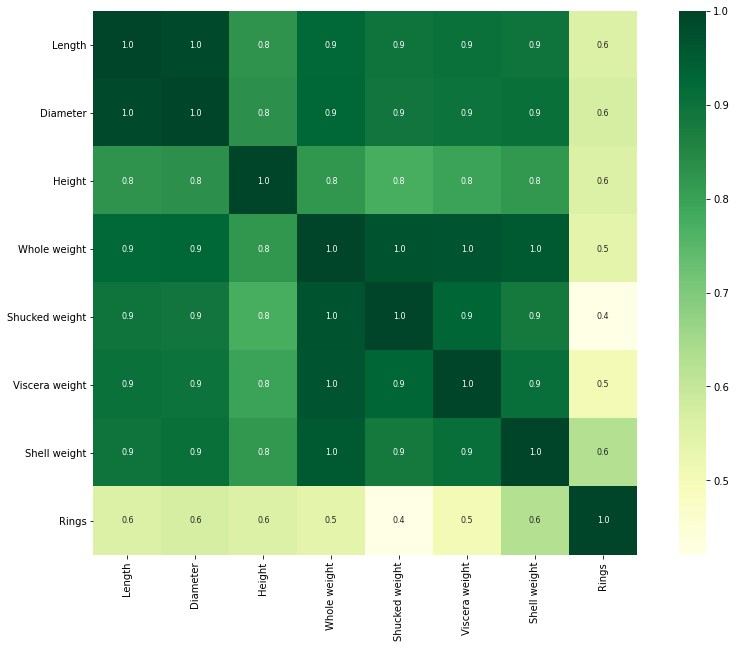

In [10]:
# Lets check the correlation with the healp of heat map
plt.figure(figsize=(15,10))
sns.heatmap(abalone_data.corr(),annot=True,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='YlGn')

In [11]:
# Lets use pd.get_dummies function because dummy variable convert categorical variable into integer like  0 and 1
abalone_data_dummies = pd.get_dummies(abalone_data['Sex'])
abalone_data_dummies.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


Using cocat funftion to merge abalone_data & abalone_data_dummies to make one final dataframe

In [12]:
final_dataframe = pd.concat([abalone_data,abalone_data_dummies],axis=1)
final_dataframe.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


As per abobe observation my 3 new columns has been added
Now lets drop sex column

In [13]:
final_dataframe = final_dataframe.drop('Sex',axis=1)

In [14]:
final_dataframe.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


As per above observation Sex column has ben successfully dropped.

In [15]:
# Lets split final_dataframe into Independent and dependent data set where x is  Independent and y is  dependent
x = final_dataframe.drop('Rings',axis=1)
y = final_dataframe['Rings']

TRAIN_TEST_SPLIT

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [17]:
# Lets check the Total no.Rows and Columns abalone_data.shape,x_train.shape & x_test.shape
print(abalone_data.shape,x_train.shape,x_test.shape)

(4177, 9) (3341, 10) (836, 10)


As per the above observation total no. of rows has been successfully divided into 80% 20% ratio however columns are showing more because earlier it was 9 then i have created 3 dummies variable for sex column. So 9+3 =12  and 1 dependent variable which is not included in x because y is the dependent variable.

SCALLING

scalling is not required as all independent columns are falling into 0 to 1 range 

Checking Wheather Rings column is Normally Distributed or not 

<AxesSubplot:xlabel='Rings'>

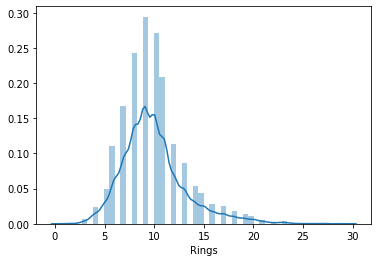

In [18]:
sns.distplot(final_dataframe['Rings'])

In [19]:
final_dataframe['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

As per the above observation it is Normally distributed

In [20]:
rd = Ridge()
rd.fit(x_train,y_train)
rd_pd = rd.predict(x_test)
r2_score(rd_pd,y_test)

0.00042639469932870266

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
r2_score(lr_pd,y_test)

0.0704884289610781

In [22]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pd = xgb.predict(x_test)
r2_score(xgb_pd,y_test)

0.23409658352315832

In [23]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest_pd = forest.predict(x_test)
r2_score(forest_pd,y_test)

0.22030230470117307

CROSS_VAL_SCORE

In [24]:
print(cross_val_score(rd,x,y,cv=5).mean())

0.4270936572522763


In [25]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.4169632914099564


In [26]:
print(cross_val_score(forest,x,y,cv=5).mean())

0.442979626416224


In [27]:
print(cross_val_score(xgb,x,y,cv=5).mean())

0.3974503456859521


In [28]:
# From the below mentioned obervation i can see that XGBRegressor has minimum difference hence i will go with XGBRegressor


#                                              r2_score                                        CV                       Diff
#  Ridge                                      0.000426395                                 0.427093657               -0.426667263
# LinearRegression                            0.070488429                                 0.416963291               -0.346474862
# RandomForestRegressor                       0.224857495                                 0.447629057               -0.222771562
# XGBRegressor                                0.234096584                                 0.397450346               -0.163353762


PARAMETER TUNING

In [39]:
parameter = {'n_estimators':[1000],
             'max_depth':[7],
             'eta':[0.1],
             'subsample':[0.7],
             'colsample_bytree':[0.8]}

In [40]:
gsc = GridSearchCV(estimator=xgb,param_grid=parameter,cv=5)
gsc.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster=None,
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method=None, validate_parameters=False,
                                    verbosity=None),
       

In [41]:
abalone_final_model = XGBRegressor(colsample_bytree=0.8,eta=0.1,max_depth=7,n_estimators=1000,subsample=0.7)
abalone_final_model.fit(x_train,y_train)
# Lets check how model is performing on test data set
predict = abalone_final_model.predict(x_test)
r2_score(predict,y_test)

0.2635638783218879

save the model

In [38]:
import joblib
joblib.dump(abalone_final_model,'Abalone_Model')

['Abalone_Model']